<a href="https://colab.research.google.com/github/daspartho/learn-pytorch/blob/main/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading data...")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping data...")
        zip_ref.extractall(image_path)
print("Done!")

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping data...
Done!


In [4]:
import os

def walk_dir(dir):
    for dirpath, dirnames, filenames in os.walk(dir):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi


In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Image path: data/pizza_steak_sushi/train/pizza/3018077.jpg
Image class: pizza
Image height: 512
Image eidth: 512


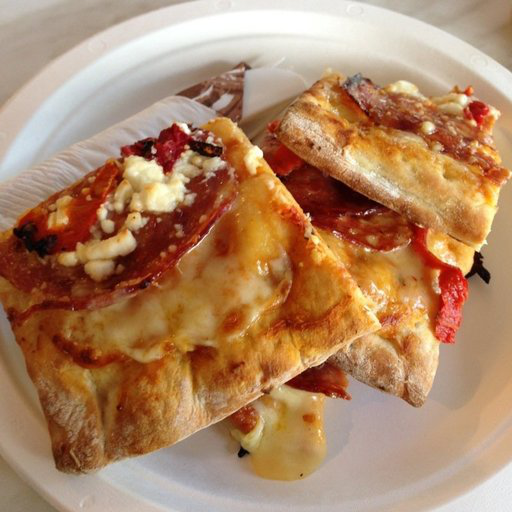

In [6]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))

rand_image_path = random.choice(image_path_list)

image_class = rand_image_path.parent.stem

img= Image.open(rand_image_path)

print(f"Image path: {rand_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image eidth: {img.width}")
img

In [7]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

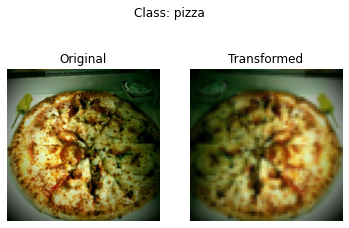

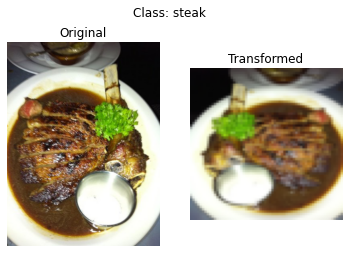

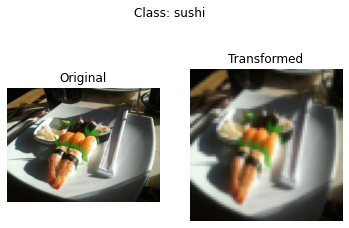

In [9]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=3):

    random_image_paths = random.sample(image_paths, k=n)

    for image_path  in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title("Original")
            ax[0].axis(False)

            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title("Transformed")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}")

plot_transformed_images(image_path_list, data_transform)

In [10]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [11]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [12]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image shape: {img.shape}")
print(f"Image label: {label}")

Image shape: torch.Size([3, 64, 64])
Image label: 0


Permuted image shape: torch.Size([64, 64, 3])


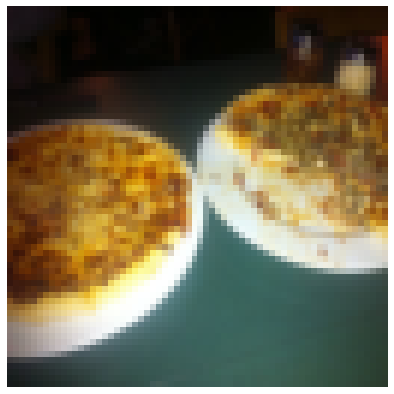

In [13]:
img_permute = img.permute(1,2,0)

print(f"Permuted image shape: {img_permute.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis(False);

In [14]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=16,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=16,
                              num_workers=1,
                              shuffle=False)

img, label = next(iter(train_dataloader))

img.shape, label.shape

(torch.Size([16, 3, 64, 64]), torch.Size([16]))